In [2]:
import cv2 as cv
from PIL import Image
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import os


BASE_DATA_DIR = "../data"
CATS = "/cat images"
VIDEOS = "/videos"

def display_as_rgb(img):
  to_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  display(Image.fromarray(to_rgb))

os.listdir(BASE_DATA_DIR + CATS)

['cat-5.png', 'cat-1.png', 'cat-0.png', 'cat-2.png', 'cat-4.png', 'cat-3.png']

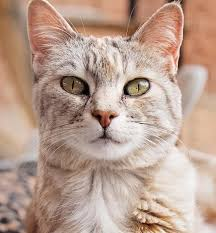

In [3]:
img = cv.imread(BASE_DATA_DIR + CATS + "/cat-3.png")
display_as_rgb(img)

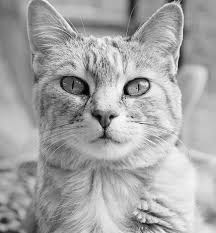

In [4]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
display_as_rgb(gray)

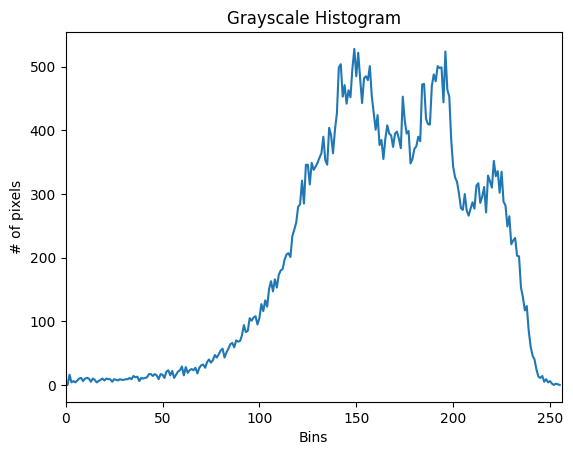

In [5]:
# Grayscale histogram
# bins ranges from 0 (black) to 255 (white)
# the histogram measures the number of pixels for each level of intensity.

gray_hist = cv.calcHist(images=[gray], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0, 256])
plt.show()

In [6]:
blank = np.zeros(img.shape[:2], dtype=np.uint8)

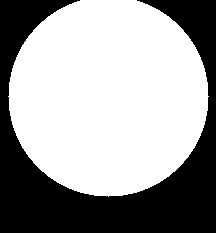

In [11]:
mask = cv.circle(blank.copy(), (img.shape[1] // 2, img.shape[0] // 2 - 20), 100, 255, -1)
display_as_rgb(mask)

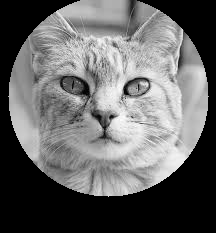

In [12]:
masked= cv.bitwise_and(gray, gray, mask=mask)
display_as_rgb(masked)

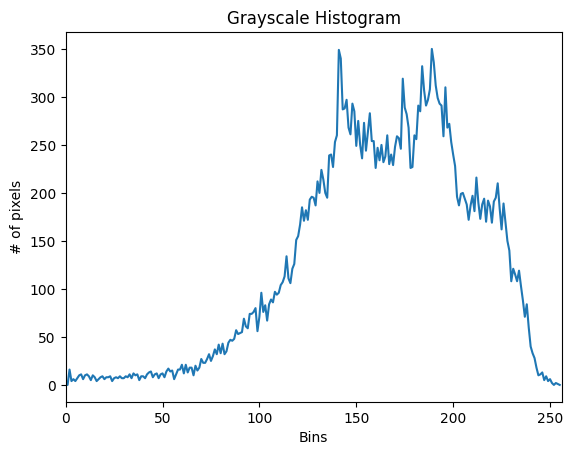

In [14]:
gray_hist2 = cv.calcHist(images=[gray], channels=[0], mask=mask, histSize=[256], ranges=[0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist2)
plt.xlim([0, 256])
plt.show()